(1133, 6)
date            object
datetime        object
cash_type       object
card            object
money          float64
coffee_name     object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1133 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   month        1133 non-null   object        
 7   day_of_week  1133 non-null   int32         
 8   hour         1133 non-null   int32         
dtypes: datetime64[ns](2), float64(1), int32(2), object(4)
memory usage: 70.9+ KB


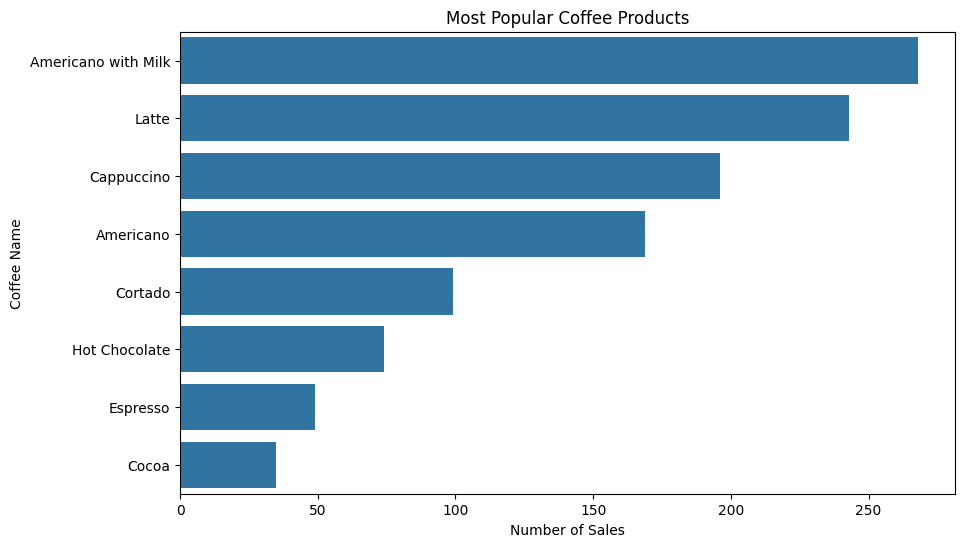

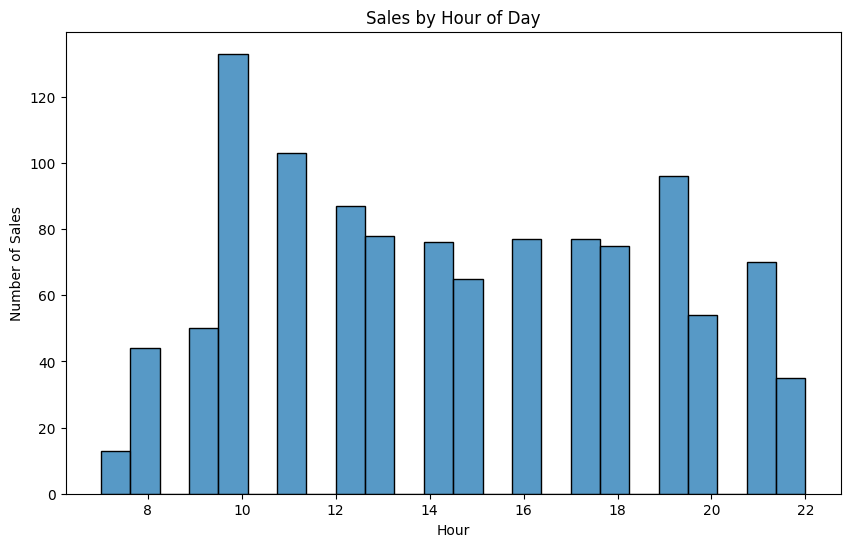

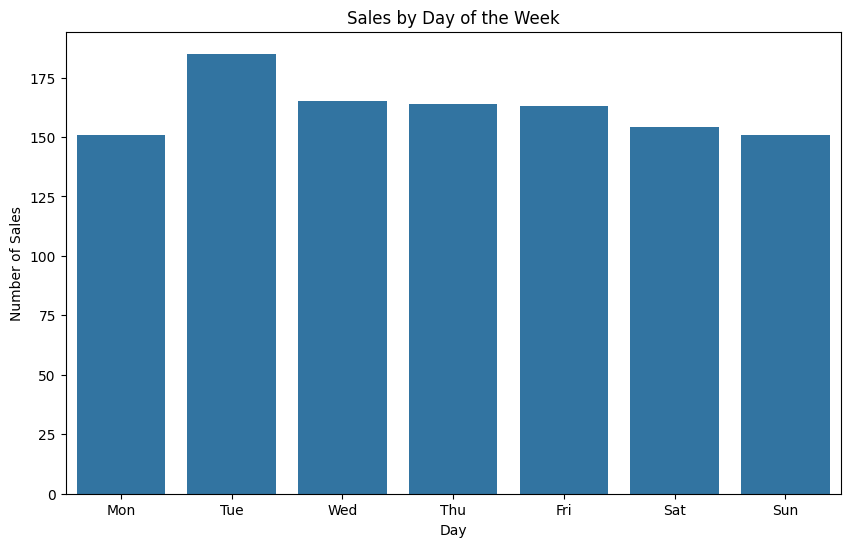

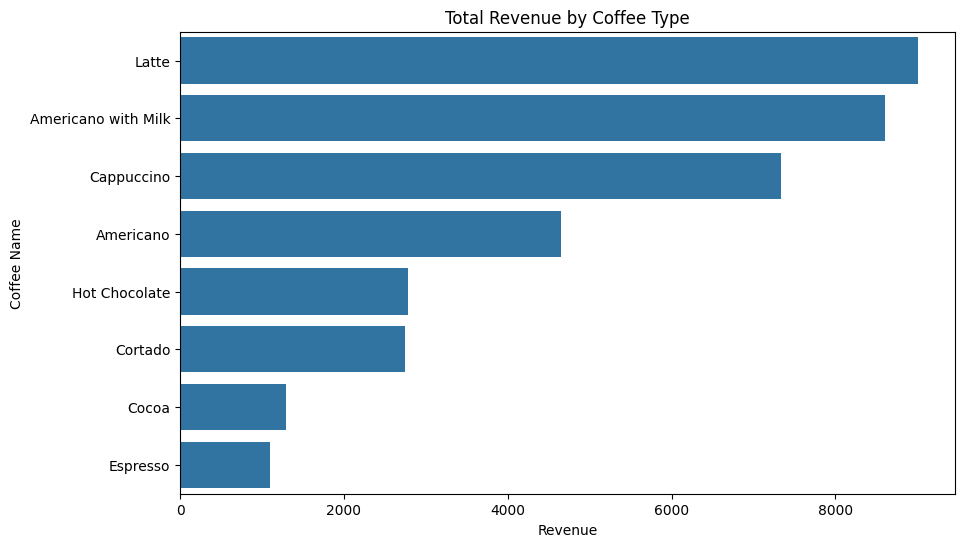

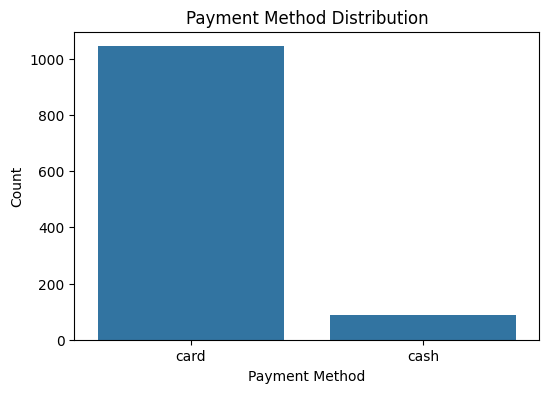

Mean Squared Error: 0.82
R² Score: 0.9561
Random Forest - MSE: 0.94
Random Forest - R² Score: 0.9495


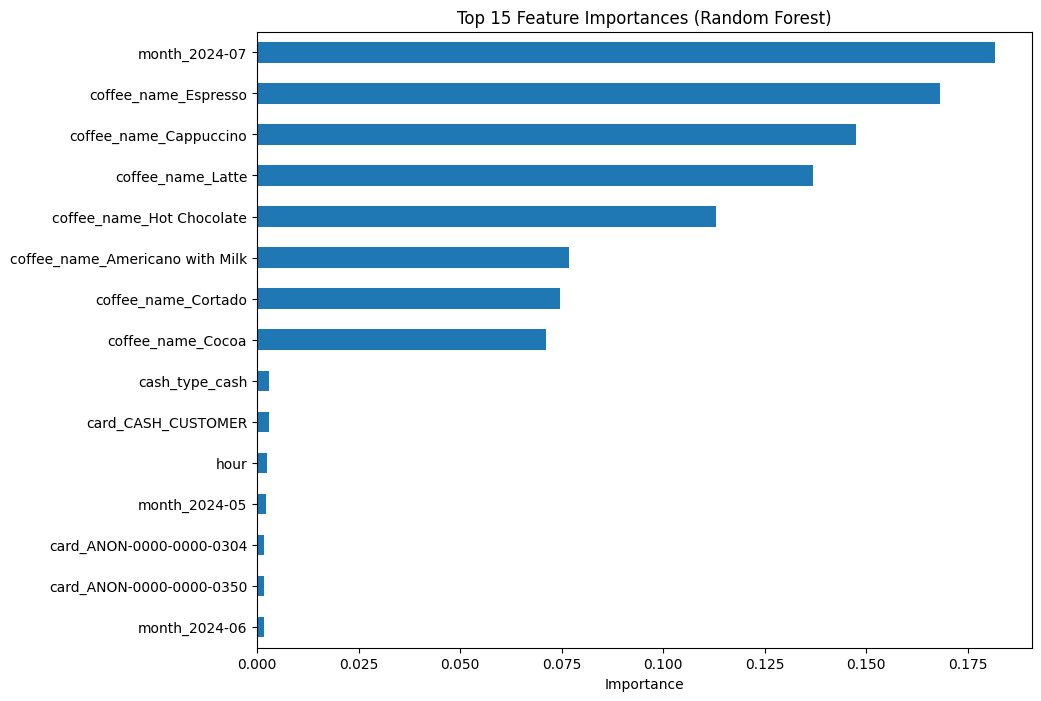

In [10]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import warnings

warnings.filterwarnings('ignore')

# Step 2: Load the data
df = pd.read_csv('coffee_sales.csv')
df.head()

# Check dataset shape and types
print(df.shape)
print(df.dtypes)

# Check missing values
df.isnull().sum()

# Convert date and datetime columns
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

df['month'] = df['date'].dt.strftime('%Y-%m')  # Monthly groupings
df['day_of_week'] = df['date'].dt.dayofweek    # 0 = Monday, 6 = Sunday
df['hour'] = df['datetime'].dt.hour            # Hour of day

# Fill missing 'card' values with a placeholder
df['card'] = df['card'].fillna('CASH_CUSTOMER')
df.info()
df.isnull().sum()
df.head()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='coffee_name', order=df['coffee_name'].value_counts().index)
plt.title('Most Popular Coffee Products')
plt.xlabel('Number of Sales')
plt.ylabel('Coffee Name')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['hour'], bins=24, kde=False)
plt.title('Sales by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Sales')
plt.show()

days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10, 6))
sns.countplot(x='day_of_week', data=df)
plt.xticks(ticks=range(7), labels=days)
plt.title('Sales by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Sales')
plt.show()


revenue_by_product = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_product.values, y=revenue_by_product.index)
plt.title('Total Revenue by Coffee Type')
plt.xlabel('Revenue')
plt.ylabel('Coffee Name')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='cash_type')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

from sklearn.model_selection import train_test_split

# Drop target and non-useful columns
X = df.drop(columns=['money', 'date', 'datetime'])

# One-hot encode categorical variables (like 'coffee_name', 'cash_type', etc.)
X = pd.get_dummies(X, drop_first=True)

# Target variable
y = df['money']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
coefficients.head(10)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf:.2f}")
print(f"Random Forest - R² Score: {r2_rf:.4f}")

# Feature importances
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 8))
importances.tail(15).plot(kind='barh')  # Show top 15 features
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.show()


